<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Introduction to Matplotlib and Line Plots</font></h1>

## Introduction

The aim of these labs is to introduce you to data visualization with Python as concrete and as consistent as possible.
Speaking of consistency, because there is no *best* data visualization library avaiblable for Python - up to creating these labs - we have to introduce different libraries and show their benefits when we are discussing new visualization concepts. Doing so, we hope to make students well-rounded with visualization libraries and concepts so that they are able to judge and decide on the best visualitzation technique and tool for a given problem _and_ audience.

Please make sure that you have completed the prerequisites for this course, namely [**Python for Data Science**](https://cognitiveclass.ai/courses/python-for-data-science/).

**Note**: The majority of the plots and visualizations will be generated using data stored in *pandas* dataframes. Therefore, in this lab, we provide a brief crash course on *pandas*. However, if you are interested in learning more about the *pandas* library, detailed description and explanation of how to use it and how to clean, munge, and process data stored in a *pandas* dataframe are provided in our course [**Data Analysis with Python**](https://cognitiveclass.ai/courses/data-analysis-python/).

------------

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Exploring Datasets with *pandas*](#0)<br>
1.1 [The Dataset: Immigration to Canada from 1980 to 2013](#2)<br>
1.2 [*pandas* Basics](#4) <br>
1.3 [*pandas* Intermediate: Indexing and Selection](#6) <br>
2. [Visualizing Data using Matplotlib](#8) <br>
2.1 [Matplotlib: Standard Python Visualization Library](#10) <br>
3. [Line Plots](#12)
</div>
<hr>

# Exploring Datasets with *pandas* <a id="0"></a>

*pandas* is an essential data analysis toolkit for Python. From their [website](http://pandas.pydata.org/):
>*pandas* is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, **real world** data analysis in Python.

The course heavily relies on *pandas* for data wrangling, analysis, and visualization. We encourage you to spend some time and  familizare yourself with the *pandas* API Reference: http://pandas.pydata.org/pandas-docs/stable/api.html.

## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the Canadian immigration data.

<img src = "https://ibm.box.com/shared/static/mb48k9fiylkd7z3a21cq38xxfy1wni2y.png" align="center" width=900>

For sake of simplicity, Canada's immigration data has been extracted and uploaded to one of IBM servers. You can fetch the data from [here](https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx).

---

## *pandas* Basics<a id="4"></a>

The first thing we'll do is import two key data analysis modules: *pandas* and **Numpy**.

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Let's download and import our primary Canadian Immigration dataset using *pandas* `read_excel()` method. But before we can do that, we need to download a module which *pandas* requires to read in excel files. This module is **xlrd**.

In [3]:
# install xlrd
!pip install xlrd

print('xlrd installed!')

xlrd installed!


Now we are ready to read in our data.

In [4]:
df_can = pd.read_excel('https://s3.hothienlac.com/yomitoon/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [5]:
df_can.head(20)
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [6]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484
196,Immigrants,Both,Total,999,World,999,World,999,World,143137,...,235822,262242,251640,236753,247244,252170,280687,248748,257903,259021


When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the `info()` method.

In [7]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      197 non-null    object
 1   Coverage  197 non-null    object
 2   OdName    197 non-null    object
 3   AREA      197 non-null    int64 
 4   AreaName  197 non-null    object
 5   REG       197 non-null    int64 
 6   RegName   197 non-null    object
 7   DEV       197 non-null    int64 
 8   DevName   197 non-null    object
 9   1980      197 non-null    int64 
 10  1981      197 non-null    int64 
 11  1982      197 non-null    int64 
 12  1983      197 non-null    int64 
 13  1984      197 non-null    int64 
 14  1985      197 non-null    int64 
 15  1986      197 non-null    int64 
 16  1987      197 non-null    int64 
 17  1988      197 non-null    int64 
 18  1989      197 non-null    int64 
 19  1990      197 non-null    int64 
 20  1991      197 non-null    int64 
 21  1992      197 no

To get the list of column headers we can call upon the dataframe's `.columns` parameter.

In [8]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

Similarly, to get the list of indicies we use the `.index` parameter.

In [9]:
df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Note: The default type of index and columns is NOT list.

In [10]:
type(df_can.columns)


pandas.core.indexes.base.Index

In [11]:
type(df_can.index)

pandas.core.indexes.range.RangeIndex

To get the index and columns as lists, we can use the `tolist()` method.

In [12]:
df_can.columns.tolist()
df_can.index.tolist()

print (type(df_can.columns.tolist()))
print (type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


To view the dimensions of the dataframe, we use the `.shape` parameter.

In [13]:
# size of dataframe (rows, columns)
df_can.shape

(197, 43)

Note: The main types stored in *pandas* objects are *float*, *int*, *bool*, *datetime64[ns]* and *datetime64[ns, tz] (in >= 0.17.0)*, *timedelta[ns]*, *category (in >= 0.15.0)*, and *object* (string). In addition these dtypes have item sizes, e.g. int64 and int32.

Let's clean the data set to remove a few unnecessary columns. We can use *pandas* `drop()` method as follows:

In [14]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Let's rename the columns so that they make sense. We can use `rename()` method by passing in a dictionary of old and new names as follows:

In [15]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [16]:
years = list(range(1980, 2014))
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:

In [17]:
df_can['Total'] = df_can[years].sum(axis=1)
df_can


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677
194,Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,...,615,454,663,611,508,494,434,437,407,8598
195,Unknown,World,World,World,44000,18078,16904,13635,14855,14368,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059


In [18]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677
Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,43,...,615,454,663,611,508,494,434,437,407,8598


In [19]:
df_country_only = df_can.drop(['Unknown', 'Total',])
df_country_only

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [20]:
df_country_only.sort_values(by='Total', ascending=False, axis=0, inplace=True)


df_country_only.head(10)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


We can check to see how many null objects we have in the dataset as follows:

Finally, let's view a quick summary of each column in our dataframe using the `describe()` method.

In [21]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.00000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02
mean,1453.167513,1306.000000,1230.203046,905.431472,896.162437,856.304569,1008.639594,1543.908629,1640.456853,1944.670051,...,2662.35533,2554.720812,2403.583756,2510.091371,2560.101523,2849.614213,2525.360406,2618.304569,2629.654822,7.029657e+04
std,10784.524807,9449.373841,8864.905615,6503.149859,6452.570413,6155.858422,7205.630681,11045.558746,11809.252241,13939.908653,...,19104.65330,18261.461660,17129.490442,17908.071420,18276.881231,20386.174875,18082.496369,18763.159434,18838.224387,5.004158e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,29.00000,26.000000,32.000000,32.000000,37.000000,42.000000,38.000000,43.000000,45.000000,9.520000e+02
50%,14.000000,10.000000,12.000000,12.000000,14.000000,17.000000,21.000000,33.000000,36.000000,45.000000,...,211.00000,230.000000,198.000000,205.000000,217.000000,216.000000,196.000000,235.000000,217.000000,5.866000e+03
75%,266.000000,299.000000,299.000000,197.000000,207.000000,202.000000,257.000000,467.000000,476.000000,538.000000,...,857.00000,856.000000,975.000000,975.000000,917.000000,953.000000,851.000000,799.000000,852.000000,2.331000e+04
max,143137.000000,128641.000000,121175.000000,89185.000000,88272.000000,84346.000000,99351.000000,152075.000000,161585.000000,191550.000000,...,262242.00000,251640.000000,236753.000000,247244.000000,252170.000000,280687.000000,248748.000000,257903.000000,259021.000000,6.924212e+06


---
## *pandas* Intermediate: Indexing and Selection (slicing)<a id="6"></a>


In [22]:
df_can.isnull().sum()

,0
Continent,0
Region,0
DevName,0
1980,0
1981,0
1982,0
1983,0
1984,0
1985,0
1986,0


### Select Column
**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.
```python
    df.column_name
        (returns series)
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']  
        (returns series)
```

```python
    df[['column 1', 'column 2']]
        (returns dataframe)
```
---

Example: Let's try filtering on the list of countries ('Country').

In [23]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677
Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,43,...,615,454,663,611,508,494,434,437,407,8598


In [24]:
df_can.index  # returns the Country index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'Unknown',
       'Total'],
      dtype='object', name='Country', length=197)

Let's try filtering on the list of countries ('OdName') and the data for years: 1980 - 1985.

In [25]:
df_can[[1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers.
# for the sake of consistency, we will convert all column names to string later on.

,1980,1981,1982,1983,1984,1985
Country,,,,,,
Afghanistan,16,39,39,47,71,340
Albania,1,0,0,0,0,0
Algeria,80,67,71,69,63,44
American Samoa,0,1,0,0,0,0
Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...
Yemen,1,2,1,6,0,18
Zambia,11,17,11,7,16,9
Zimbabwe,72,114,102,44,32,29


Before we proceed, notice that the defaul index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corressponding index value.

This can be fixed very easily by setting the 'Country' column as the index using `set_index()` method.

### Select Row

There are main 3 ways to select rows:

```python
    df.loc[label]        
        #filters by the labels of the index/column
    df.iloc[index]       
        #filters by the positions of the index/column
```

In [26]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [27]:
# optional: to remove the name of the index
df_can.index.name = None

Example: Let's view the number of immigrants from Japan (row 87) for the following scenarios:
    1. The full row data (all columns)
    2. For year 2013
    3. For years 1980 to 1985

In [28]:
# 1. the full row data (all columns)
print(df_can.loc['Japan'])

# alternate methods
print(df_can.iloc[87])
print(df_can[df_can.index == 'Japan'].T.squeeze())

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [29]:
# 3. for years 1980 to 1985
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])
print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object
1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object


In [30]:
# 2. for year 2013
print(df_can.loc['Japan', 2013])

# alternate method
print(df_can.iloc[87, 36]) # year 2013 is the last column, with a positional index of 36

982
982


Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [31]:
df_can.columns = list(map(str, df_can.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [32]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Filtering based on a criteria
To filter the dataframe based on a condition, we simply pass the condition as a boolean vector.

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).

In [33]:
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print (condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Yemen              True
Zambia            False
Zimbabwe          False
Unknown           False
Total             False
Name: Continent, Length: 197, dtype: bool


In [34]:
# 2. pass this condition into the dataFrame
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


In [35]:
# we can pass mutliple criteria in the same line.
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


Before we proceed: let's review the changes we have made to our dataframe.

In [36]:
print ('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (197, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


---
# Visualizing Data using Matplotlib<a id="8"></a>

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/).  As mentioned on their website:
>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.


Let's start by importing `Matplotlib` and `Matplotlib.pyplot` as follows:

In [37]:
# we are using the inline backend
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

*optional: check if Matplotlib is loaded.

In [38]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.10.0


*optional: apply a style to Matplotlib.

In [39]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:
- [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
- [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)

# Line Pots (Series/Dataframe) <a id="12"></a>

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.


First, we will extract the data series for Haiti.

**Giả thuyết & Câu hỏi**

Bối cảnh: Haiti là một quốc gia thuộc vùng Caribbean thường xuyên gặp khó khăn về kinh tế và thiên tai. Một sự kiện lịch sử đáng chú ý là trận động đất kinh hoàng năm 2010.

**Giả thuyết:**

Trong điều kiện bình thường, số lượng người nhập cư sẽ duy trì ở mức trung bình và ổn định.

Tuy nhiên, tôi kỳ vọng sẽ thấy một cú sốc (spike) tăng vọt vào khoảng năm 2010 hoặc 2011, phản ánh nỗ lực nhân đạo của Canada trong việc tiếp nhận người tị nạn sau thảm họa động đất.

Câu hỏi: Liệu dữ liệu có hiển thị rõ tác động của trận động đất 2010 không? Và sau đó xu hướng có giảm trở lại không?

In [40]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

,Haiti
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.

**2. Vẽ biểu đồ**

Thực hiện yêu cầu df.plot() với dữ liệu của Haiti

<Axes: >

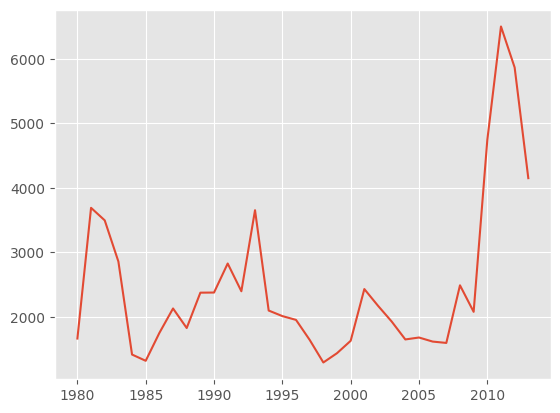

In [41]:
haiti.plot()

*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). However, notice how the years were not displayed because they are of type *string*. Therefore, let's change the type of the index values to *integer* for plotting.

Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:

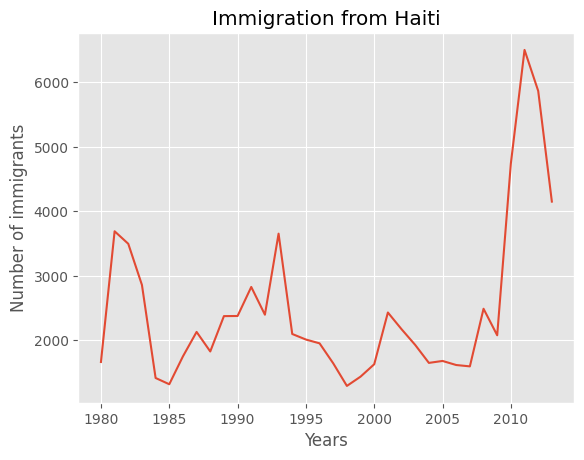

In [42]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # Need this line to show the updates made to the figure

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` method.

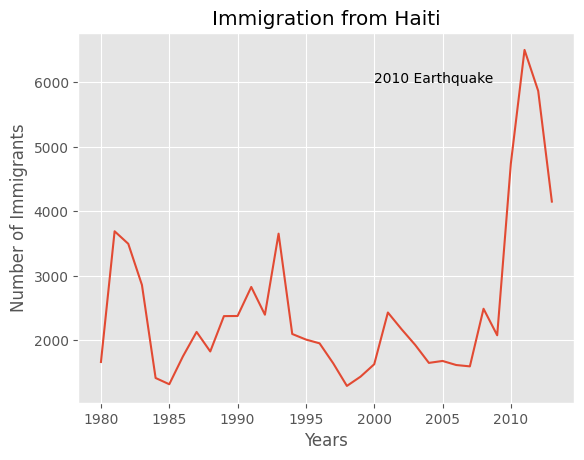

In [43]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake.
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show()

**3.Kết luận**

Nhìn vào biểu đồ, ta có thể thấy rõ ràng:

Giai đoạn trước 2010: Số lượng người nhập cư dao động trong khoảng 1.500 đến 3.000 người/năm, khá ổn định trong suốt 30 năm.

Điểm bất thường (The Spike): Đúng như giả thuyết, đường biểu đồ dựng đứng đột ngột bắt đầu từ năm 2010, đạt đỉnh cao nhất trong lịch sử nhập cư của Haiti vào Canada (lên tới khoảng 6.000 - 7.000 người).

**Nguyên nhân:** Sự tăng vọt này tương ứng chính xác với thảm họa động đất Haiti năm 2010, khi chính phủ Canada triển khai các chương trình định cư đặc biệt để hỗ trợ nạn nhân.

Sau sự kiện: Số lượng bắt đầu giảm dần sau năm 2011 nhưng vẫn giữ ở mức cao hơn so với trung bình của những thập kỷ trước đó.



With just a few lines of code, you were able to quickly identify and visualize the spike in immigration!

Quick note on x and y values in `plt.text(x, y, label)`:
    
     Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
    
```python
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
```
    If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
```python
    plt.text(20, 6000, '2010 Earthquake') # years stored as type int
```
    We will cover advanced annotation methods in later modules.

We can easily add more countries to line plot to make meaningful comparisons immigration from different countries.

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

Trung Quốc và Ấn Độ là hai quốc gia đông dân nhất thế giới và đều là những nền kinh tế mới nổi đang phát triển mạnh mẽ trong giai đoạn 1980 - 2013.

  **•	Giả thuyết:**

  Về xu hướng chung: cả hai quốc gia đều sẽ có xu hướng tăng trưởng về số lượng người nhập cư vào Canada theo thời gian do toàn cầu hóa và nhu cầu tìm kiếm cơ hội kinh tế tốt hơn.

  Về khác biệt: Do sự phát triển kinh tế và biến động chính trị xã hội khác nhau, đường biểu diễn của hai nước sẽ không song song. Có thể có một nước biến động bất thường hơn trong khi nước kia tăng trưởng ổn định hơn.

  **•	Câu hỏi cần trả lời:**

  Nước nào có tốc độ tăng trưởng nhập cư nhanh hơn?

  Có năm nào đánh dấu sự thay đổi cục diện (nước này vượt nước kia) không?

  Xu hướng của họ là "bền vững" hay "bùng nổ nhất thời"?


In [44]:
### type your answer here
df_country_only


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2


In [45]:
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [46]:
df_CI.T

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527
1985,4211,1816
1986,7150,1960
1987,10189,2643
1988,11522,2758
1989,10343,4323


<div align="right">
<a href="#p1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>

<div id="p1" class="collapse">
```
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()
```
</div>

Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

2. Vẽ biểu đồ
Để kiểm chứng giả thuyết trên, loại biểu đồ phù hợp nhất là Biểu đồ đường.

    Lý do: ta đang so sánh sự thay đổi của biến số lượng theo thời gian. Biểu đồ đường giúp mắt người dễ dàng nhận ra độ dốc và các điểm giao cắt.


<Axes: >

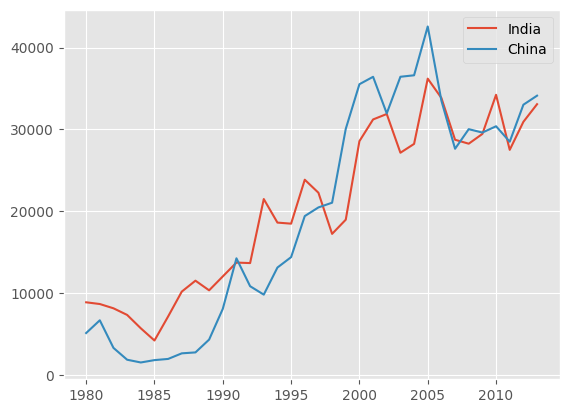

In [47]:
### type your answer here

df_CI.T.plot(kind='line')

**Kết luận & Đối chiếu giả thuyết**

**Quan sát từ biểu đồ:**

    •	Điểm xuất phát: Năm 1980, Ấn Độ (khoảng 8.800 người) cao hơn Trung Quốc (khoảng 5.100 người).

    •	Điểm giao cắt (Crossover): Khoảng năm 1998-1999, hai đường cắt nhau. Đây là thời điểm bước ngoặt khi Trung Quốc bắt đầu vượt qua Ấn Độ.

    •	Điểm cực đại: Trung Quốc đạt đỉnh vào năm 2005 (hơn 42.000 người), một con số kỷ lục mà Ấn Độ chưa chạm tới trong giai đoạn này.

**Đối chiếu với giả thuyết:**

1.	Giả thuyết "Cả hai cùng tăng": ĐÚNG. So với năm 1980, đến năm 2013 cả hai nước đều có lượng nhập cư tăng gấp nhiều lần.

2.	Giả thuyết "Sự khác biệt về tính chất tăng trưởng": ĐÚNG và rất rõ rệt.

      o	Ấn Độ (Đường màu cam): Tăng trưởng khá "bền vững" và ít biến động giật cục. Đường đi lên khá đều đặn.

      o	Trung Quốc (Đường màu xanh): Mang tính "bùng nổ". Tăng rất dốc từ năm 1990 đến 2005, nhưng sau khi đạt đỉnh 2005 thì lại giảm xuống và đi ngang.





**Kết luận cuối cùng:**

Dữ liệu cho thấy trong khi Ấn Độ là nguồn nhập cư ổn định và đáng tin cậy theo thời gian, thì Trung Quốc là nguồn nhập cư có tính biến động cao, phản ánh những thay đổi mạnh mẽ trong nội tại kinh tế/xã hội của Trung Quốc hoặc chính sách của Canada đối với nước này trong giai đoạn 1998-2005.

<div align="right">
<a href="#p2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>

<div id="p2" class="collapse">
```
df_CI.plot(kind='line')
```
</div>

That doesn't look right...

Recall that *pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.

In [48]:
df_CI = df_CI.transpose()
df_CI.head()

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


*pandas* will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.

In [49]:
### type your answer here




<div align="right">
<a href="#p3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>

<div id="p3" class="collapse">
```
df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()
```
</div>

From the above plot, we can observe that the China and India have very similar immigration trends through the years.

*Note*: How come we didn't need to transpose Haiti's dataframe before plotting (like we did for df_CI)?

That's because `haiti` is a series as opposed to a dataframe, and has the years as its indices as shown below.
```python
print(type(haiti))
print(haiti.head(5))
```
>class 'pandas.core.series.Series' <br>
>1980    1666 <br>
>1981    3692 <br>
>1982    3498 <br>
>1983    2860 <br>
>1984    1418 <br>
>Name: Haiti, dtype: int64 <br>

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

**Question:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

**1. Hypothesis**

  Trước khi đi sâu vào dữ liệu, chúng ta hãy đặt ra một số giả thuyết dựa trên kiến thức chung về địa chính trị giai đoạn 1980 - 2013:

      •	Giả thuyết 1: Sẽ có sự thay đổi rõ rệt về cấu trúc nguồn gốc nhập cư: Các quốc gia châu Á (như Ấn Độ, Trung Quốc, Philippines) sẽ tăng trưởng mạnh và dần chiếm lĩnh vị trí dẫn đầu.
      •	Giả thuyết 2: Các quốc gia phương Tây truyền thống (như Vương quốc Anh - UK) có thể sẽ có xu hướng giảm hoặc đi ngang do kinh tế ổn định và ít động lực di cư hơn so với các nước đang phát triển.
      •	Câu hỏi cần trả lời: Quốc gia nào là "ngôi sao mới nổi" có tốc độ tăng trưởng nhanh nhất? Liệu vị thế số 1 có thay đổi qua các năm không?


In [50]:
### type your answer here

top5 = df_country_only.sort_values(by='Total', ascending=False, axis=0, inplace=False).head(5)
top5



,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


2. Vẽ biểu đồ

    Dữ liệu có sự thay đổi của biến số lượng theo thời gian. Nên em chọn biểu đồ đường, giúp nhìn dữ liệu một cách đầy đủ, thấy được xu hướng của dữ liệu.


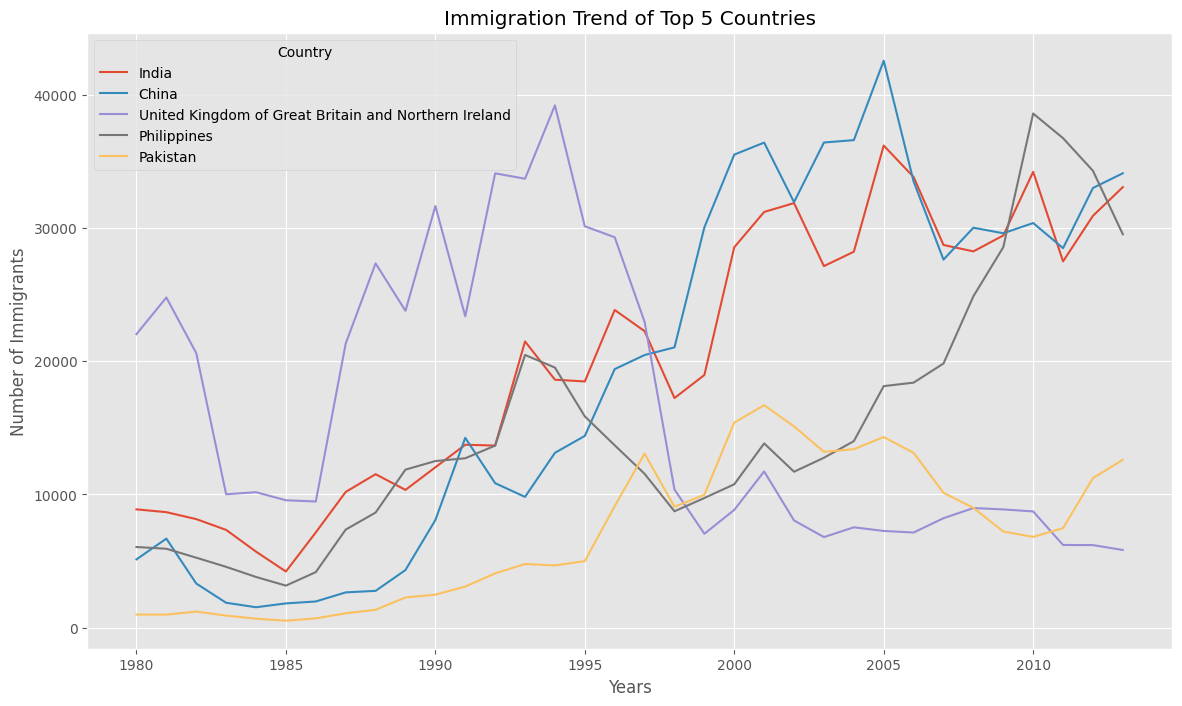

In [52]:
# The error occurs because the column names representing the years in the 'top5' DataFrame
# might still be integers, while the 'years' list contains string representations of those years.
# To fix this, we need to ensure that the column names in 'top5' are also strings.

# Convert column names to string type, just in case they are still integers.
# This ensures consistency with the 'years' list which contains string-type year labels.
top5.columns = top5.columns.map(str)

# Select only the year columns for plotting and transpose the DataFrame
df_plot = top5[years].T

# Convert the index of the transposed DataFrame to integers for proper plotting on the x-axis
df_plot.index = df_plot.index.map(int)

# Plot the area chart
df_plot.plot(kind='line', figsize=(14, 8))

# Add title and labels to the plot
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# Display the plot
plt.show()

**3. Kết luận & Đối chiếu giả thuyết**

a. Sự trỗi dậy của Châu Á (Xác nhận Giả thuyết 1):

  Ấn Độ & Trung Quốc: Như đã phân tích trước đó, cả hai đều tăng trưởng mạnh.

  Philippines: Đây là bất ngờ lớn nhất. Philippines bắt đầu ở mức thấp (khoảng 6.000 người vào năm 1980) nhưng tăng trưởng cực kỳ ấn tượng, đặc biệt là giai đoạn sau năm 2000. Đến năm 2010-2011, Philippines thậm chí đã có thời điểm vượt qua cả Ấn Độ và Trung Quốc để trở thành nguồn nhập cư lớn nhất trong một số năm cụ thể (đạt đỉnh gần 39.000 người).

b. Sự suy giảm của Phương Tây (Xác nhận Giả thuyết 2):

  Vương quốc Anh: Xu hướng hoàn toàn trái ngược với nhóm châu Á. Năm 1980, UK là quốc gia dẫn đầu với khoảng 22.000 người. Tuy nhiên, con số này giảm dần theo thời gian (dù có đợt tăng nhẹ vào đầu thập niên 90). Đến năm 2013, lượng nhập cư từ UK chỉ còn khoảng 5.800 người, rơi xuống vị trí thấp nhất trong Top 5. Điều này phản ánh sự dịch chuyển trọng tâm nhập cư của Canada từ Châu Âu sang Châu Á - Thái Bình Dương.

c. Pakistan:

  Cũng là một đại diện châu Á tăng trưởng, nhưng quy mô nhỏ hơn so với 3 quốc gia kia. Xu hướng của Pakistan khá biến động nhưng nhìn chung là tăng dần đều theo thời gian.

**Tổng kết:**

  Bức tranh nhập cư Canada trong 34 năm là câu chuyện về sự "đổi ngôi ngoạn mục". Từ chỗ bị thống trị bởi Vương quốc Anh (đầu thập niên 80), Canada đã chuyển sang đón nhận làn sóng nhập cư khổng lồ từ Ấn Độ, Trung Quốc và đặc biệt là sự bùng nổ của Philippines trong thập kỷ gần đây.

<div align="right">
<a href="#p4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>

<div id="p4" class="collapse">
```
# Step 1: Get the dataset. Recall that we created a Total column that calculates the cumulative immigration by country. We will sort on this column to get our top 5 countries using pandas sort_values() method.

# inplace = True paramemter saves the changes to the original df_can dataframe
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose()

print(df_top5)

# Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

```
</div>

### Other Plots

Congratulations! you have learned how to wrangle data with python and create a line plot with Matplotlib. There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

* `bar` for vertical bar plots
* `barh` for horizontal bar plots
* `hist` for histogram
* `box` for boxplot
* `kde` or `density` for density plots
* `area` for area plots
* `pie` for pie plots
* `scatter` for scatter plots
* `hexbin` for hexbin plot

### Thank you for completing this lab!

This notebook was originally created by [Jay Rajasekharan](https://www.linkedin.com/in/jayrajasekharan) with contributions from [Ehsan M. Kermani](https://www.linkedin.com/in/ehsanmkermani), and [Slobodan Markovic](https://www.linkedin.com/in/slobodan-markovic).

This notebook was recently revised by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab session interesting. Feel free to contact me if you have any questions!

This notebook is part of the free course on **Cognitive Class** called *Data Visualization with Python*. If you accessed this notebook outside the course, you can take this free self-paced course online by clicking [here](https://cocl.us/DV0101EN_Lab1).

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).